In [26]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [27]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7"]
continuous_colors = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", 
                     "#e4bcad", "#df979e", "#d7658b", "#c80064"]
custom_palette = {'l': colors[1], 's': colors[0]}

In [28]:
cohort = 'cohort_3_v23'
to_analyze = 'full_clean_stitched'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
figure_folder = os.path.join(data_dir, cohort, 'figures_stitched_new_good')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_3_v23/full_clean_stitched
/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_3_v23/figures_stitched_new_good


# Session based plotting

### load session log

In [29]:
training_session_log = utils.load_session_log(data_folder, 'stitched_training_sessions.csv')

make mouse list

In [30]:
mouse_list = utils.generate_mouse_list(training_session_log)
print(mouse_list)

['RZ018', 'RZ019', 'RZ020', 'RZ021', 'RZ022', 'RZ023', 'RZ024', 'RZ025']


### Add session type 
shoudl be moved to the previous nb

In [31]:
def get_session_tb(all_trials):
    bg_length = all_trials.bg_length.mean()
    if bg_length <= 2:
        session_type = 's'
    elif bg_length > 2:
        session_type = 'l'
    return [session_type, bg_length]

In [32]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    # time waited for all trials
    bg_info = get_session_tb(all_trials)
    training_session_log.loc[training_session_log.dir == dir_name, 
                                ['session_type', 'bg_length']] = bg_info

In [33]:
len(training_session_log.loc[(training_session_log.session_type == 's') & (training_session_log.mouse == 'RZ018')])

9

In [34]:
for t in ['s', 'l']:
    for mouse in mouse_list:
        training_session_log.loc[(training_session_log.session_type == t) & (training_session_log.mouse == mouse)]
        total_sessions = len(training_session_log.loc[(training_session_log.session_type == 's') & (training_session_log.mouse == 'RZ018')])
        training_session_log.loc[(training_session_log.session_type == t) & (training_session_log.mouse == mouse), 'days'] = list(range(total_sessions))

In [35]:
training_session_log

,date,mouse,dir,filename,num_sessions,num_blocks,num_trials,rewards,time,proper_end,session_num,session_type,bg_length,days
0,2023-09-21,RZ018,2023-09-21_RZ018,processed_data_RZ018_2023-09-21.csv,1,1.0,298.0,900.7,2900.31,True,0,s,1.240523,0.0
8,2023-09-22,RZ018,2023-09-22_RZ018,processed_data_RZ018_2023-09-22.csv,1,1.0,259.0,864.9,2588.97,True,1,s,1.208989,1.0
16,2023-09-25,RZ018,2023-09-25_RZ018,processed_data_RZ018_2023-09-25.csv,1,1.0,547.0,797.5,3601.77,True,2,s,1.148873,2.0
24,2023-09-26,RZ018,2023-09-26_RZ018,processed_data_RZ018_2023-09-26.csv,1,1.0,274.0,853.6,2482.13,True,3,s,1.399755,3.0
32,2023-09-27,RZ018,2023-09-27_RZ018,processed_data_RZ018_2023-09-27.csv,1,1.0,370.0,521.6,2485.79,True,4,s,1.257439,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023-10-12,RZ025,2023-10-12_RZ025,processed_data_RZ025_2023-10-12.csv,1,1.0,406.0,904.9,2758.88,True,13,s,1.217847,4.0
119,2023-10-13,RZ025,2023-10-13_RZ025,processed_data_RZ025_2023-10-13.csv,1,1.0,272.0,903.0,2182.70,True,14,s,1.415303,5.0
127,2023-10-16,RZ025,2023-10-16_RZ025,processed_data_RZ025_2023-10-16.csv,1,1.0,398.0,905.0,2704.61,True,15,s,1.143764,6.0
135,2023-10-18,RZ025,2023-10-18_RZ025,processed_data_RZ025_2023-10-18.csv,1,1.0,373.0,904.4,2558.53,True,16,s,1.171472,7.0


In [36]:
filename = f'training_sessions.csv'
path = os.path.join(data_folder, filename)
training_session_log.to_csv(path)

### checking if there are mixed long and short sessions between the two cohorts

In [8]:
short_list = ['RZ018', 'RZ019', 'RZ022', 'RZ023']
long_list = ['RZ020', 'RZ021', 'RZ024', 'RZ025']

In [9]:
for m in short_list:
    short_df = training_session_log.loc[training_session_log.mouse == m]
    session_type_list = short_df.session_type.unique().tolist()
    if len(session_type_list) == 1:
        print(m)

RZ018
RZ019
RZ022
RZ023


In [10]:
for m in long_list:
    short_df = training_session_log.loc[training_session_log.mouse == m]
    session_type_list = short_df.session_type.unique().tolist()
    if len(session_type_list) == 1:
        print(m)

RZ020
RZ021
RZ024
RZ025


### Plotting functions
should be moved to helper

In [37]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session_num, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [38]:
def plot_each_mouse_per_line_last_days(data_df, num_days, column_name, plot_name, title, x_label, y_label,
                                       figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        last_days = session_mouse.nlargest(num_days, 'session_num')
        last_days['last_day_num'] = list(range(num_days))
        plt.plot(last_days.last_day_num, last_days[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [57]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, mouse_list=mouse_list, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="days",
                 y=column_name,
                 hue="session_type",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Plot type of trials per session

### generate trial type df for plotting
Calculate proportions of trials types and generate trial type df

In [63]:
def generate_trial_type_df(training_session_log):
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == dir_name, 
                                 ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'session_type', 'days', 'session_num', 'num_trials', 
                                          'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

In [64]:
trial_type_df = generate_trial_type_df(training_session_log)

### trial type combined plot

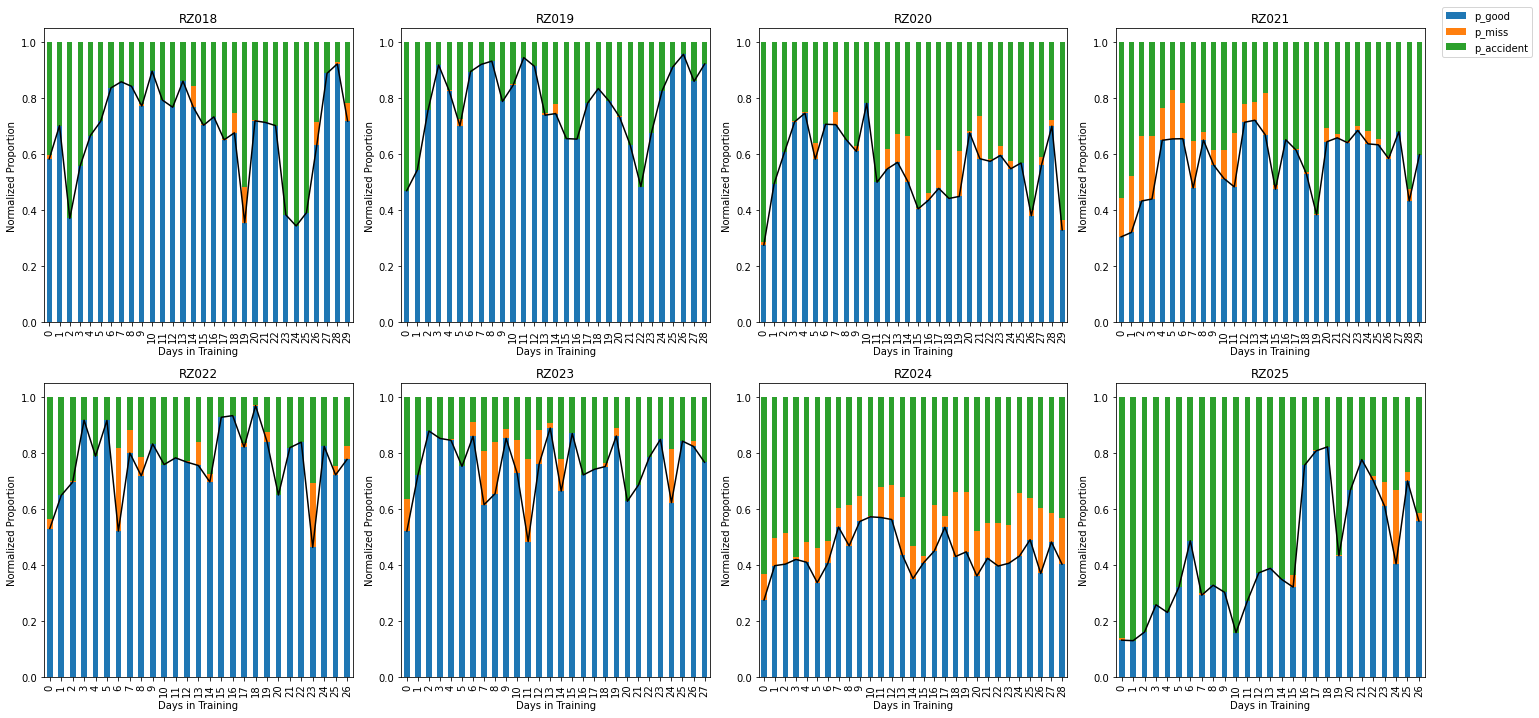

In [16]:
# ploting the proportion of good trials, miss trials, and enl trials per session
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df.loc[trial_type_df.mouse == mouse]
    to_plot = session_mouse.loc[:, ['session_num', 'p_good', 'p_miss', 'p_accident']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='session_num', stacked=True, ax=ax, legend=None)
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.session_num, to_plot.p_good, color='k', linewidth=1.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.07, 1))

plt.tight_layout()
plt.savefig(f'{figure_folder}/engagement_plots.png', bbox_inches='tight')
plt.show()

### percentage good trials

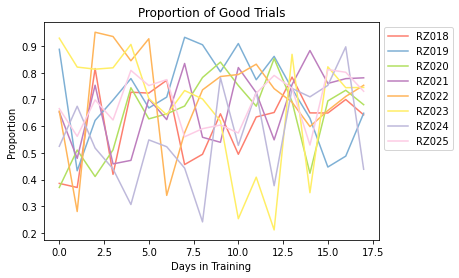

In [61]:
# plot the proportion of good trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

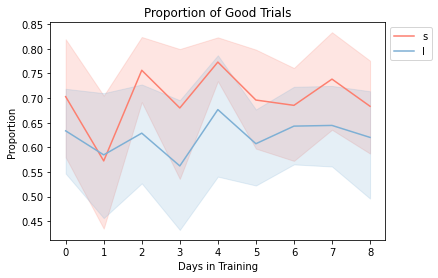

In [65]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

### Percent missed trials

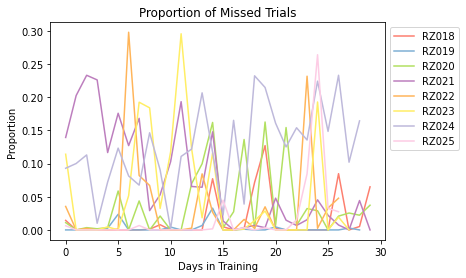

In [20]:
# plot the proportion of miss trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Days in Training', 
                         y_label='Proportion')

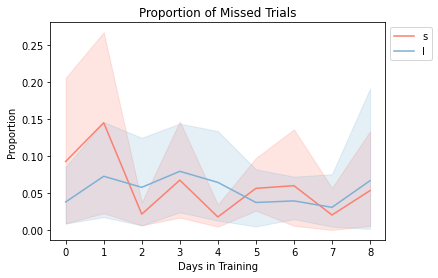

In [66]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

### Percent accident trials

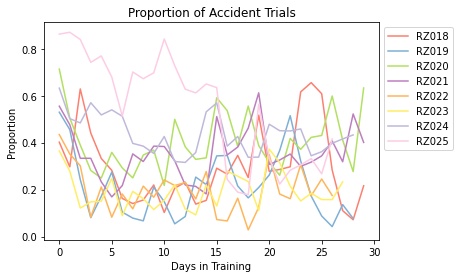

In [22]:
# plot the proportion of accident trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

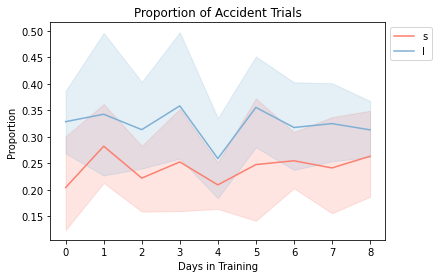

In [67]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

# Plot rewards per session

### add info to training session log for plotting

In [44]:
training_session_log['reward_rate'] = training_session_log.rewards/training_session_log.time

In [45]:
training_session_log['reward_per_trial'] = training_session_log.rewards/training_session_log.num_trials

### plot reward size

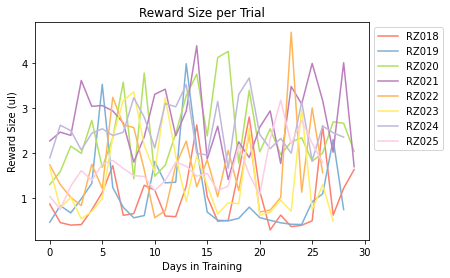

In [26]:
# plot the reward rize
plot_each_mouse_per_line(data_df=training_session_log, 
                         column_name='reward_per_trial', 
                         plot_name="reward_size",
                         title='Reward Size per Trial', 
                         x_label='Days in Training', 
                         y_label='Reward Size (ul)')

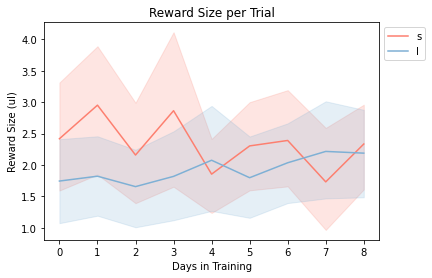

In [68]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="reward_per_trial", 
                               plot_name='reward_size_by_group', 
                               title='Reward Size per Trial', 
                               x_label='Days in Training', 
                               y_label='Reward Size (ul)')

### Plot reward rate

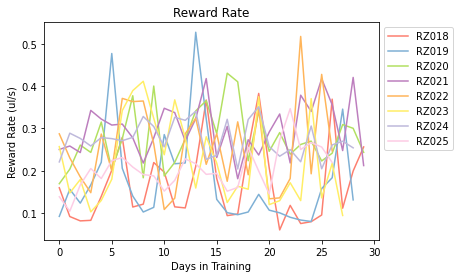

In [28]:
# plot the reward rate
plot_each_mouse_per_line(data_df=training_session_log, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Days in Training', 
                         y_label='Reward Rate (ul/s)')

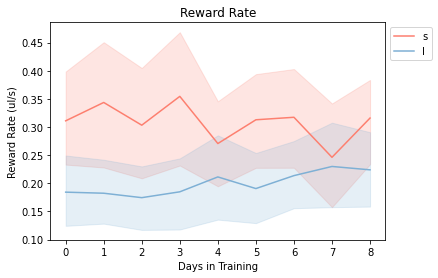

In [69]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Days in Training', 
                               y_label='Reward Rate (ul/s)')

### Plot session length

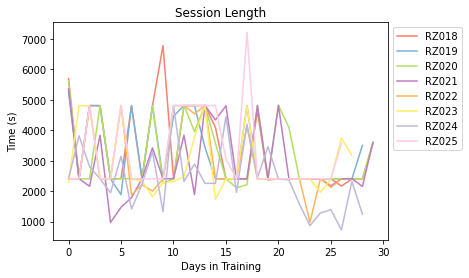

In [30]:
# plot the session length
plot_each_mouse_per_line(data_df=training_session_log, 
                         column_name='time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Days in Training', 
                         y_label='Time (s)')

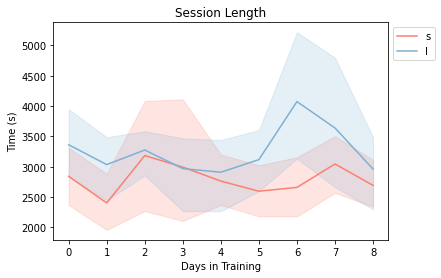

In [70]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Days in Training', 
                               y_label='Time (s)')

### plot num trials completed

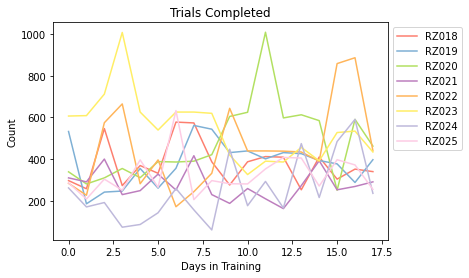

In [71]:
# plot the number of trials completed
plot_each_mouse_per_line(data_df=training_session_log, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Days in Training', 
                         y_label='Count')

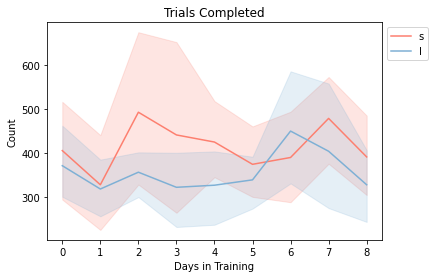

In [72]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Days in Training', 
                               y_label='Count')

# Plot time wait behavior

### generate wait df for plotting

In [80]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session_num', 'days', 'dir', 'session_type', 'bg_length']].copy()

    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [81]:
wait_df = generate_wait_df(training_session_log)

In [82]:
wait_df

,mouse,session_num,days,dir,session_type,bg_length,tw_mean,tw_median,tw_stdev,tw_mean_g,tw_median_g,tw_stdev_g
0,RZ018,0,0.0,2023-09-21_RZ018,s,1.240523,4.309099,4.260096,2.904039,4.166339,4.000003,2.806434
8,RZ018,1,1.0,2023-09-22_RZ018,s,1.208989,4.787508,5.108165,2.835208,4.373518,4.218851,2.763720
16,RZ018,2,2.0,2023-09-25_RZ018,s,1.148873,2.217051,2.031293,1.307389,2.151181,2.027551,1.125685
24,RZ018,3,3.0,2023-09-26_RZ018,s,1.399755,3.659265,3.469838,2.660236,3.566340,3.121059,2.373745
32,RZ018,4,4.0,2023-09-27_RZ018,s,1.257439,2.159983,1.959908,1.479728,2.064701,1.901390,1.369343
...,...,...,...,...,...,...,...,...,...,...,...,...
111,RZ025,13,4.0,2023-10-12_RZ025,s,1.217847,2.577345,2.557962,1.160105,2.398112,2.430277,1.030800
119,RZ025,14,5.0,2023-10-13_RZ025,s,1.415303,3.340193,3.024533,1.865368,2.967071,2.813500,1.716375
127,RZ025,15,6.0,2023-10-16_RZ025,s,1.143764,2.651671,2.572890,1.147552,2.448059,2.406753,1.047534
135,RZ025,16,7.0,2023-10-18_RZ025,s,1.171472,2.687787,2.553971,1.319753,2.575366,2.433136,1.202101


In [53]:
wait_df_s = wait_df[wait_df.session_type == 's']
wait_df_s.tw_mean.mean()

2.7312750641778303

In [54]:
wait_df_l = wait_df[wait_df.session_type == 'l']
wait_df_l.tw_mean.mean()

2.385104135049545

### plot time watied

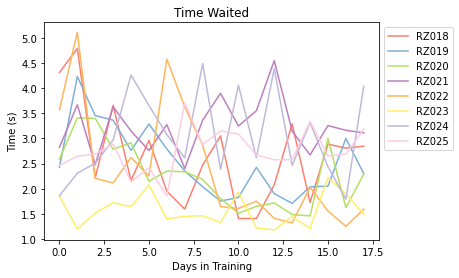

In [83]:
# plot the time waited over days. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean', 
                         plot_name="tw_mean", 
                         title='Time Waited',
                         x_label='Days in Training', 
                         y_label='Time (s)')

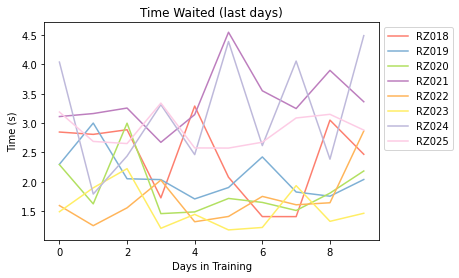

In [84]:
plot_each_mouse_per_line_last_days(data_df=wait_df, 
                                   num_days=10,
                         column_name='tw_mean', 
                         plot_name="tw_mean_last", 
                         title='Time Waited (last days)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

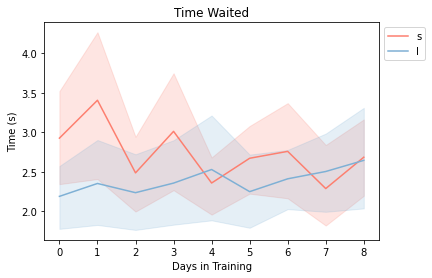

In [85]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean", 
                               plot_name='tw_mean_by_group', 
                               title='Time Waited', 
                               x_label='Days in Training', 
                               y_label='Time (s)')

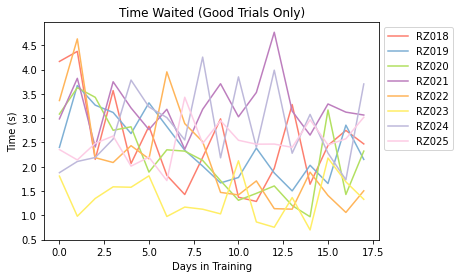

In [87]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

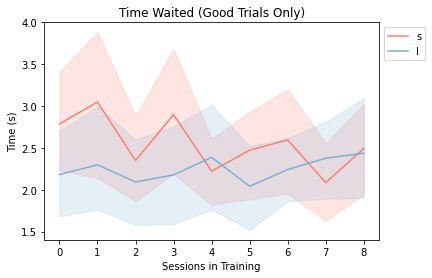

In [86]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions in Training', 
                               y_label='Time (s)')

## some stats

### check if short and long tw are significantly different?
yes for both all trials and good trials only
where should this session go??

In [ ]:
short = wait_df[wait_df['session_type']=='s']
long = wait_df[wait_df['session_type']=='l']

#perform independent two sample t-test
ttest_ind(short['tw_mean'], long['tw_mean'])

In [ ]:
print(short.tw_mean.mean())
print(long.tw_mean.mean())

In [ ]:
ttest_ind(short['tw_mean_g'], long['tw_mean_g'])

In [ ]:
print(short.tw_mean_g.mean())
print(long.tw_mean_g.mean())

### check if boys and girls are significantly different
nope they are not different

In [ ]:
boys =  ['RZ018', 'RZ019', 'RZ020', 'RZ021']
girls = ['RZ022', 'RZ023', 'RZ024', 'RZ025']

In [ ]:
boy = wait_df[wait_df['mouse'].isin(boys)]
girl = wait_df[wait_df['mouse'].isin(girls)]

ttest_ind(boy['tw_mean_g'], girl['tw_mean_g'])

## linear fit
not so useful for this part

In [ ]:
def generate_linear_fit_df(training_session_log):
    linear_fit_df = training_session_log[['mouse', 'session_type', 'session_num', 'dir']].copy()
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        all_trials = all_trials[all_trials['time_waited'].notna()]
        fit_data = utils.linear_fit(all_trials, 'bg_length', 'time_waited')
        linear_fit_df.loc[linear_fit_df.dir == dir_name, 
                                ['slope', 'intercept', 'rsquared']] = fit_data
    return linear_fit_df

In [ ]:
linear_fit_df = generate_linear_fit_df(training_session_log)

In [ ]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(data_df=linear_fit_df, 
                         column_name='slope', 
                         plot_name="tb_tw_correlation", 
                         title='Correlation between Background Length and Time Waited',
                         x_label='Days in Training', 
                         y_label=' ')

In [ ]:
plot_overdays_colored_by_group(data_df=linear_fit_df, 
                               column_name="slope", 
                               plot_name='tb_tw_correlation_by_group', 
                               title='Correlation between Background Length and Time Waited', 
                               x_label='Days in Training', 
                               y_label=' ')

In [ ]:
fig = plt.figure()
sns.pointplot(x="session_num", 
              y="slope", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig(f'{figure_folder}/tb_tw_correlation_all_mice.png', bbox_inches='tight')

In [ ]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(data_df=linear_fit_df, 
                         column_name='rsquared', 
                         plot_name="tb_tw_correlation_rsuqared", 
                         title='R Squared of Correlation between Background Length and Time Waited',
                         x_label='Days in Training', 
                         y_label=' ')

In [ ]:
plot_overdays_colored_by_group(data_df=linear_fit_df, 
                               column_name="rsquared", 
                               plot_name='tb_tw_correlation_rsuqared_by_group', 
                               title='R Squared of Correlation between Background Length and Time Waited', 
                               x_label='Days in Training', 
                               y_label=' ')

In [ ]:
fig = plt.figure()
sns.pointplot(x="session_num", 
              y="rsquared", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig(f'{figure_folder}/tb_tw_rsquared_all_mice.png', bbox_inches='tight')

## plots to be figured out

In [ ]:
# time wait per mouse with mean and median
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 3 columns

for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df.loc[wait_df.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.session_num, session_mouse.tw_mean, session_mouse.tw_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.session_num, session_mouse.tw_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')
    ax.set_ylim(0,7.5)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig(f'{figure_folder}/tw_plots.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# time wait good per mouse, with mean and median
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df.loc[wait_df.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.session_num, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.session_num, session_mouse.tw_median_g, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')
    ax.set_ylim(0,7.5)

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_good_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [ ]:
def calculate_subplot_row_col(session_mouse, plots_per_row):
    days_trained = len(session_mouse)
    num_rows = (days_trained - 1) // plots_per_row + 1
    num_cols = min(days_trained, plots_per_row)
    return num_rows, num_cols

In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    num_rows, num_cols = calculate_subplot_row_col(session_mouse, 5)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, sess) in enumerate(zip(session_mouse.dir, session_mouse.session_num)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Session {sess}')
        ax.set_ylim([0, 10])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, sess) in enumerate(zip(session_mouse.dir, session_mouse.session_num)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Session {sess}')
        ax.set_ylim([0, 10])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, sess) in enumerate(zip(session_mouse.dir, session_mouse.session_num)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[1], 's': colors[0]}
        
        sns.scatterplot(x="bg_length",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Session {sess}')
        ax.set_ylim([0, 10])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

# Stitched all sessions all mice per day

In [ ]:
cohort = 'cohort_3'
to_analyze = 'full_clean_stitched_all_mice'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
figure_folder = os.path.join(data_dir, cohort, 'figures_stitched_all_mice')
print(data_folder)
print(figure_folder)

In [ ]:
stitched_log = utils.load_session_log(data_folder, 'stitched_all_mice_training_sessions.csv')

In [ ]:
stitched_log

In [ ]:
def generate_stitched_all_mice_all_trials_path(data_folder, d):
    return os.path.join(data_folder, d, f'{d}_all_trials_analyzed.csv')

In [ ]:
def load_stitched_all_trials_all_mice_analyzed(data_folder, d):
    path = generate_stitched_all_mice_all_trials_path(data_folder, d)
    all_trials_analyzed_df = pd.read_csv(path, index_col=0)
    return all_trials_analyzed_df

In [ ]:
def generate_stitched_wait_df(training_session_log):
    wait_df = training_session_log[['date', 'days']].copy()

    for d in training_session_log.date:
        all_trials = load_stitched_all_trials_all_mice_analyzed(data_folder, d)
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.date == d, 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.date == d, 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 8 + 1
num_cols = min(days_trained, 8)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 2.5 * num_rows))

for i, (d, day) in enumerate(zip(stitched_log.date, stitched_log.days)):
    all_trials = load_stitched_all_trials_all_mice_analyzed(data_folder, d)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="blk_type",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.blk_type == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.blk_type == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    ax.set_title(f'Day {day+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
all_trials.loc[all_trials.blk_type == 'l']['time_waited'].mean()

In [ ]:
all_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 8 + 1
num_cols = min(days_trained, 8)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 2.5 * num_rows))

for i, (d, day) in enumerate(zip(stitched_log.date, stitched_log.days)):
    all_trials = load_stitched_all_trials_all_mice_analyzed(data_folder, d)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="blk_type",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.blk_type == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.blk_type == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_title(f'Day {day}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
def select_non_accident_trials(all_trials):
    non_accident_trials = all_trials[all_trials['time_waited'] > 0.5]
    return non_accident_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 8 + 1
num_cols = min(days_trained, 8)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 2.5 * num_rows))

for i, (d, day) in enumerate(zip(stitched_log.date, stitched_log.days)):
    all_trials = load_stitched_all_trials_all_mice_analyzed(data_folder, d)
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="blk_type",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.blk_type == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.blk_type == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_title(f'Day {day}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_g_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
stitched_log

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 8 + 1
num_cols = min(days_trained, 8)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 2.5 * num_rows))

for i, (d, day) in enumerate(zip(stitched_log.date, stitched_log.days)):
    all_trials = load_stitched_all_trials_all_mice_analyzed(data_folder, d)
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="blk_type",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.blk_type == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.blk_type == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_title(f'Day {day}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_g_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
# cohort = 'cohort_2'
to_analyze = 'full_clean_analyzed'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
# figure_folder = os.path.join(data_dir, cohort, 'figures')
# data_folder = os.path.join(data_dir, cohort, to_analyze)
# print(data_folder)
# print(figure_folder)

In [ ]:
v1_data_folder = os.path.join(data_dir, 'cohort_1', 'full_clean')
v2_data_folder = os.path.join(data_dir, 'cohort_2', 'full_clean_analyzed')
v3_data_folder = os.path.join(data_dir, 'cohort_2_v2', 'full_clean')

In [ ]:
v1_wait = utils.load_session_log(v1_data_folder, 'wait.csv')
v2_wait = utils.load_session_log(v2_data_folder, 'wait.csv')
v3_wait = utils.load_session_log(v3_data_folder, 'wait.csv')

In [ ]:
v1_l = v1_wait.tw_l_mean.mean()
v2_l = v2_wait.tw_l_mean.mean()
v3_l = v3_wait.tw_l_mean.mean()

v1_s = v1_wait.tw_s_mean.mean()
v2_s = v2_wait.tw_s_mean.mean()
v3_s = v3_wait.tw_s_mean.mean()

In [ ]:
wait_time_l = [v1_l, v2_l, v3_l]
wait_time_s = [v1_s, v2_s, v3_s]

In [ ]:
sum(wait_time_l)/3

In [ ]:
sum(wait_time_s)/3

In [ ]:
stitched_log